In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings

import numpy as np
from numpy import array
import pandas as pd
from pandas import concat
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import ParameterGrid
import seaborn as sns
pd.plotting.register_matplotlib_converters()

warnings.filterwarnings("ignore")

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100      
      
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
file=pd.read_csv()

In [124]:
plt.style.use(style='ggplot') 

In [125]:
#plt.style.available

In [126]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'archive',
 'daily_trend.pdf',
 'hour , consumption.ipynb',
 'logs.log',
 'MAPE-values.jpg',
 'Monthly_trend.pdf',
 'trend.pdf',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'weekly_trend.pdf',
 'yearly.pdf']

In [148]:
frame_day=pd.DataFrame()
frame_week=pd.DataFrame()
frame_month=pd.DataFrame()

def data(num):
    def season(month):
        """adding season based on the data on SDGE's site -> https://www.sdge.com/whenmatters#how-it-works; 
        months from June to October are denoted as 'summer' and months from November to May as 'winter'. """
        if month in [6,7,8,9,10]:
            return "summer"
        else:
            return "winter"
    
    df = pd.read_csv(r'archive/'+str(num)+'.csv')
    df.drop(columns=['end'],inplace=True)
    df['start'] = pd.to_datetime(df['start'])
    df.rename(columns ={'load':'load'+'_'+str(num)},inplace=True)
    df["Date"] = df["start"].map(lambda ts: ts.strftime("%d-%m-%Y"))
    df["Date"]=pd.to_datetime(df.Date)
    df_h=df.resample('H', on='Date').sum().reset_index().dropna()
    df_m=df.resample('M', on='Date').sum().reset_index().dropna()
    df_w=df.resample('W', on='Date').sum().reset_index().dropna()
    df_d=df.resample('D', on='Date').sum().reset_index().dropna()
    frame_day['Date']=df_d['Date']
    frame_day['load'+'_'+str(num)]=df_d['load'+'_'+str(num)]   
    frame_day['dayofweek'] = frame_day['Date'].dt.dayofweek
    frame_day['month'] = frame_day['Date'].dt.month
    frame_day['year'] = frame_day['Date'].dt.year
    frame_day['dayofmonth'] = frame_day['Date'].dt.day
    frame_day['hour'] = df_h['Date'].dt.hour
#    frame_day['season'] = frame_day['Date'].dt.month.apply(season)

    frame_week['Date']=df_w['Date']
    frame_week['load'+'_'+str(num)]=df_w['load'+'_'+str(num)]
    frame_week['dayofweek'] = frame_week['Date'].dt.dayofweek
    frame_week['month'] = frame_week['Date'].dt.month
    frame_week['year'] = frame_week['Date'].dt.year
    frame_week['dayofmonth'] = frame_week['Date'].dt.day
    
    
    frame_month['Date']=df_m['Date']
    frame_month['load'+'_'+str(num)]=df_m['load'+'_'+str(num)]
    frame_month['dayofweek'] = frame_month['Date'].dt.dayofweek
    frame_month['month'] = frame_month['Date'].dt.month
    frame_month['year'] = frame_month['Date'].dt.year
    frame_month['dayofmonth'] = frame_month['Date'].dt.day
    return frame_day,frame_week,frame_month

In [149]:
count=['nl','de','ch','fr','be','it','es','at']
for i in count:
    data(i)

In [150]:
mask=frame_week['Date']<'2020-01-01'

In [151]:
maskd=frame_day['Date']<'2020-01-01'

In [152]:
frame_day=frame_day[maskd]

In [153]:
frame_week=frame_week[mask]

In [154]:
#The seasonality patterns can be examined by using boxplots. Seasonality in month can be clearly confirmed for ...
# some countries has more outliers that the others, indicating that their sales is more difficult to predict.

In [155]:
#Seasonality analysis

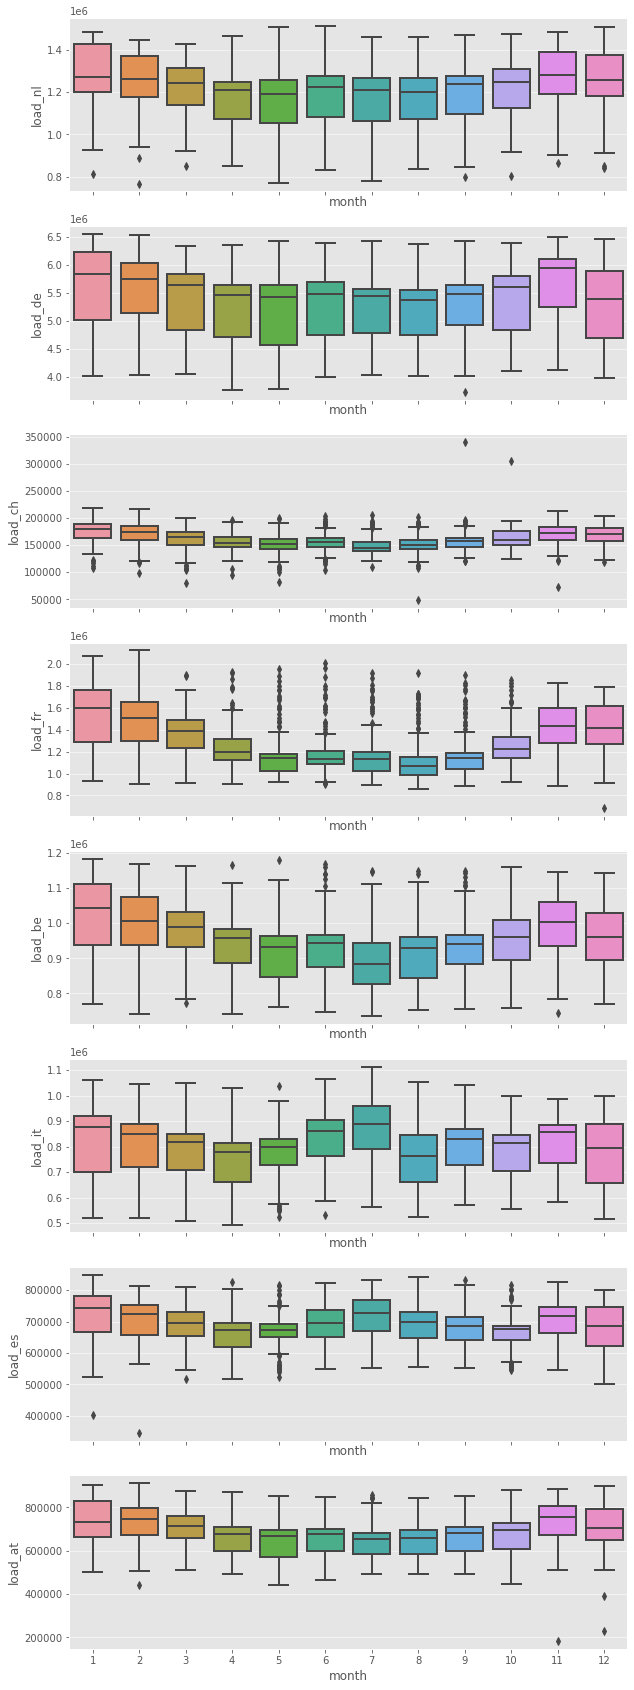

In [158]:
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['load_nl','load_de','load_ch','load_fr','load_be','load_it','load_es','load_at'], axes):
    sns.boxplot(data=frame_day, x='month', y=name, ax=ax)


Weekly seasonality in month can not be seen vividly.

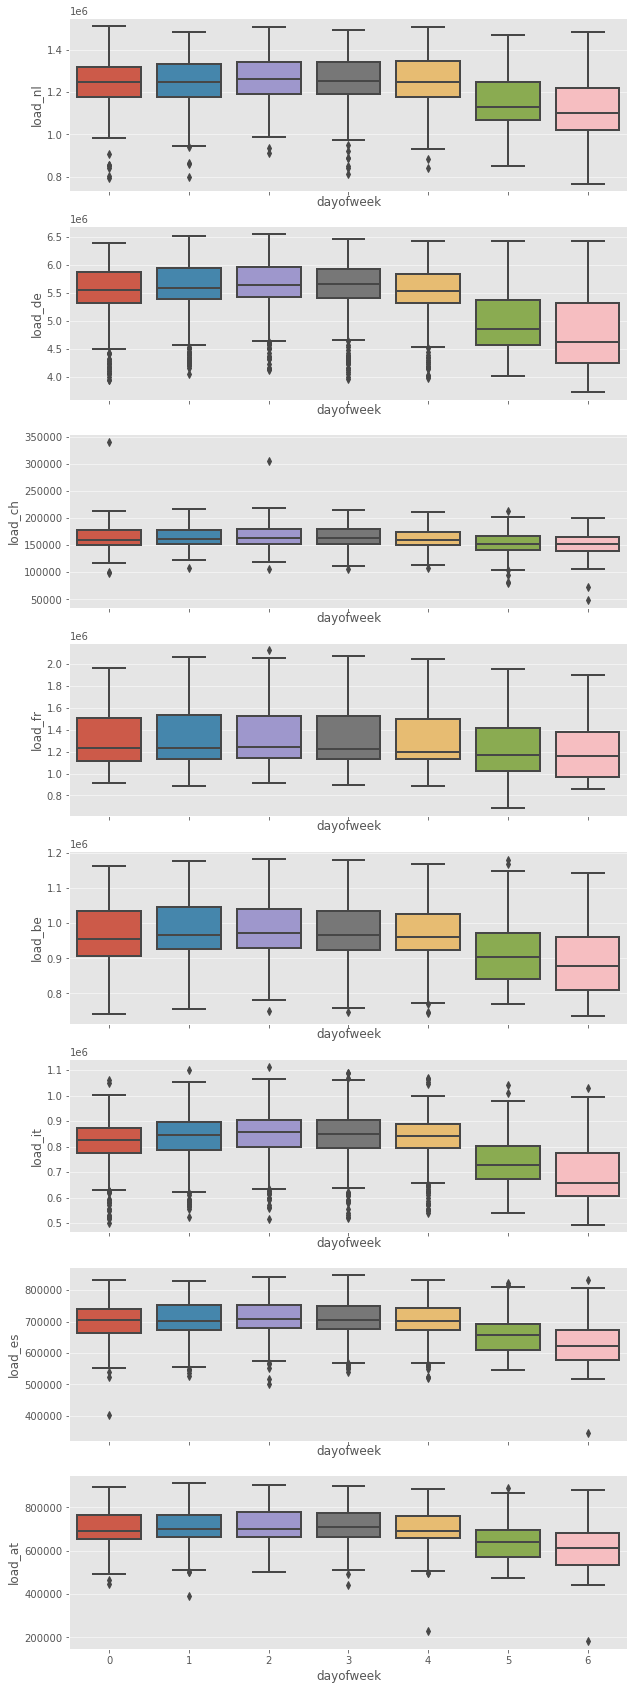

In [159]:
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['load_nl','load_de','load_ch','load_fr','load_be','load_it','load_es','load_at'], axes):
    sns.boxplot(data=frame_day, x='dayofweek', y=name, ax=ax)

Another visualization that can be useful for discovering seasonality patterns is related to rolling window means. Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and the data in each window is aggregated with a function such as mean(), median(), sum(), etc.
Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at larger time scales. Analysis below shows 30-day and 365-day rolling mean and 30-day rolling standard deviation of sales data.

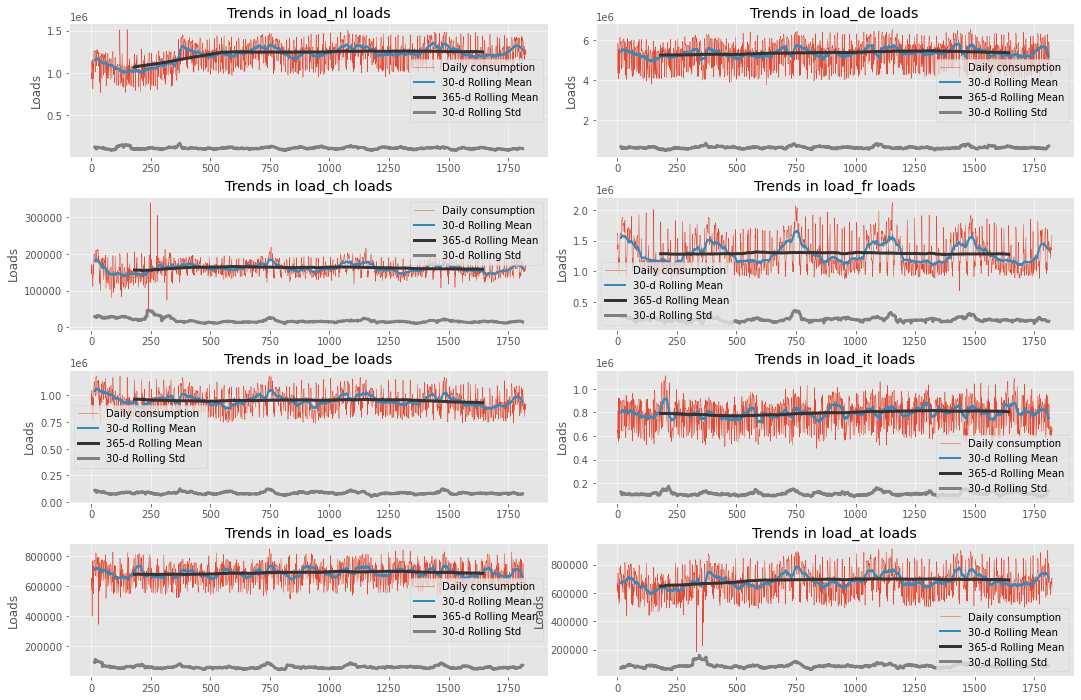

In [160]:
cols_plot = ['load_nl','load_de','load_ch','load_fr','load_be','load_it','load_es','load_at']
dfatc_365d = frame_day[cols_plot].rolling(window=365, center=True).mean()
dfatc_30d = frame_day[cols_plot].rolling(30, center=True).mean()
dfatc_std = frame_day[cols_plot].rolling(30, center=True).std()
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(frame_day.loc[:,x], linewidth=0.5, label='Daily consumption')
    ax[rowindex,colindex].plot(dfatc_30d.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_365d.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_std.loc[:,x], color='0.5', linewidth=3, label='30-d Rolling Std')
    ax[rowindex,colindex].set_ylabel('Loads')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in '+x+' loads');   
    subplotindex=subplotindex+1
plt.show()

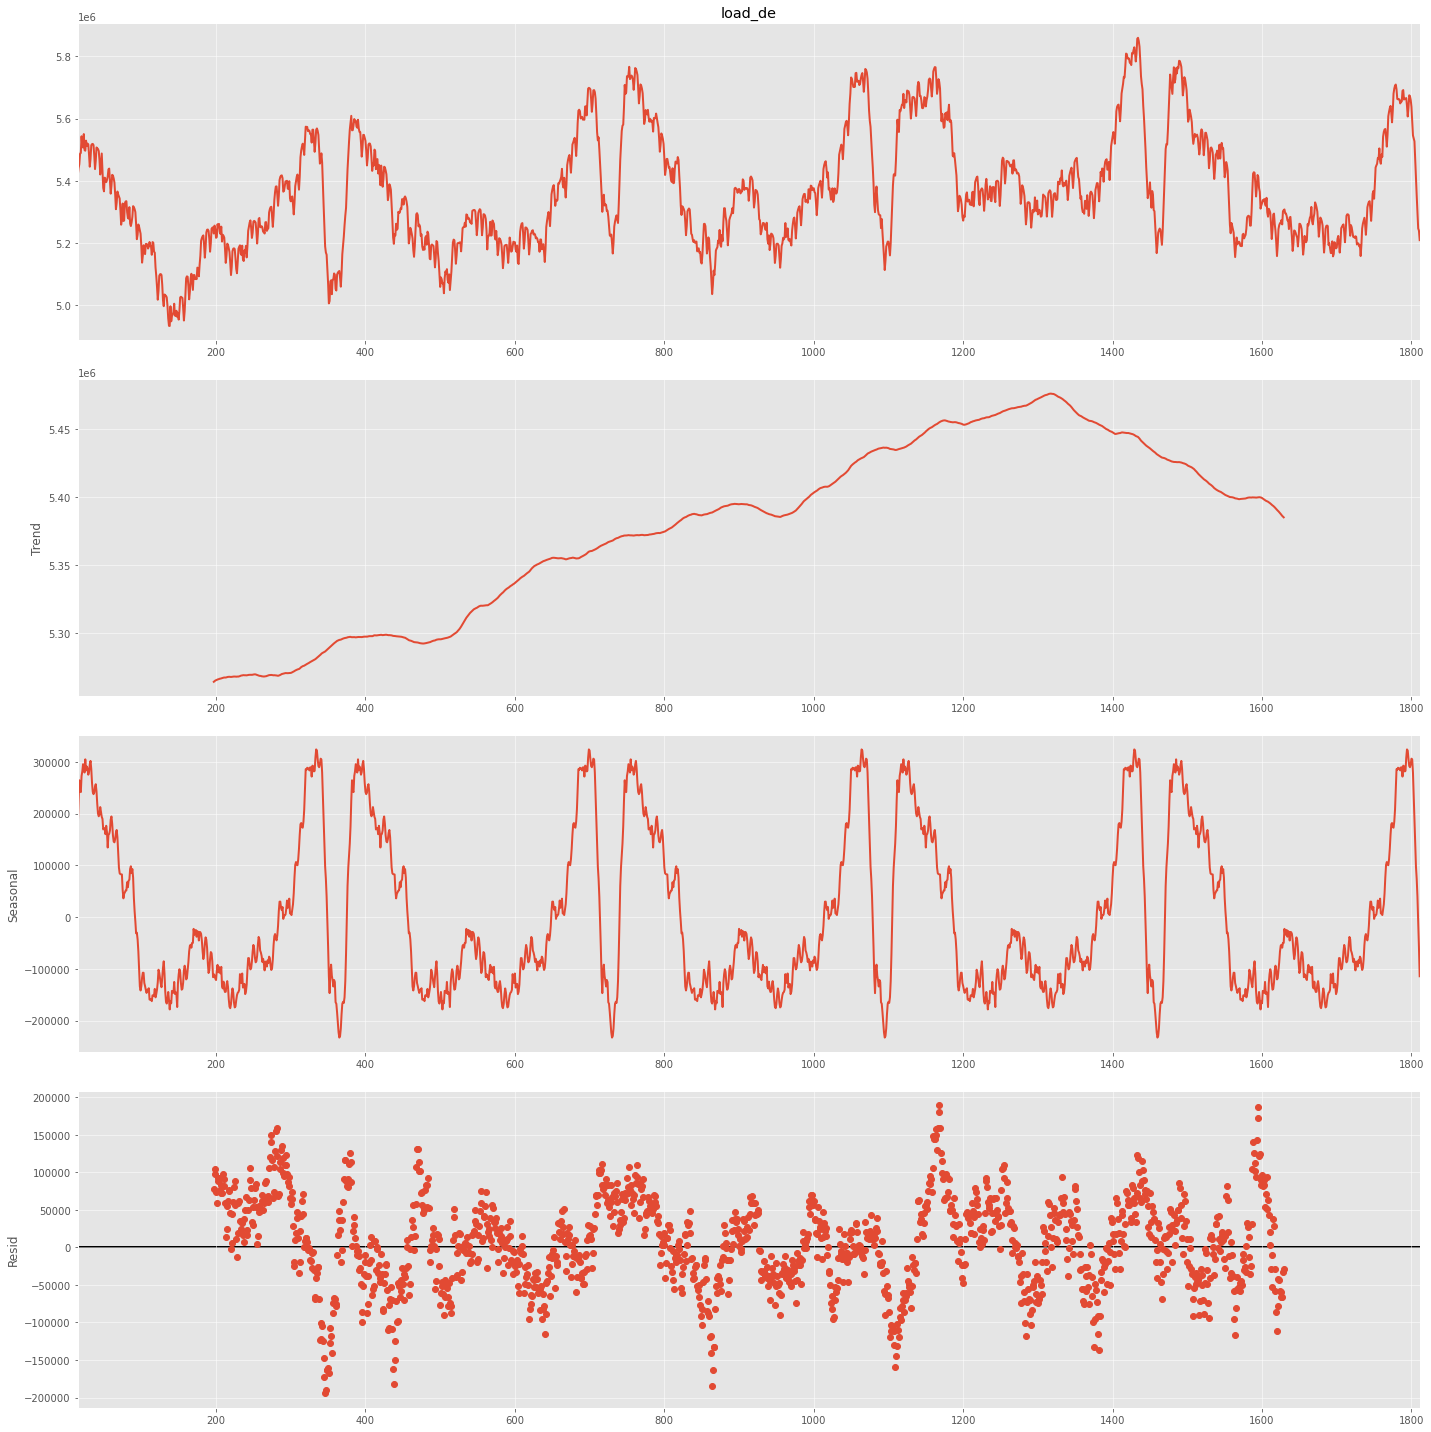

In [161]:
#Trends and seasonality can be explored in time series decomposition view, based on 30d rolling means.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(frame_day['load_de'].rolling(30, center=True).mean().dropna(), freq=365, filt=None)
plt.rcParams["figure.figsize"] = (20,20)
result.plot()
plt.show()

In [162]:
#seasonal_decompose function can be used for analysising each component of time series.  higher the residuals, lower the predictability
for x in cols_plot:
    result = seasonal_decompose(frame_week[x], freq=52, model='additive')
    dfs = pd.concat([result.trend, result.seasonal, result.resid, result.observed], axis=1)
    dfs.columns = ['trend', 'seasonal', 'residuals', 'observed']
    dfs=dfs.dropna()
    res=dfs['residuals'].values
    obs=dfs['observed'].values
    resmean=np.mean(np.abs(res))
    obsmean=np.mean(np.abs(obs))
    perc=resmean*100/obsmean
    print(x+' RESMEAN:'+str(resmean)+', OBSMEAN:'+str(obsmean)+', PERC:'+str(perc)+'%')

load_nl RESMEAN:189990.73634333152, OBSMEAN:8589110.444976076, PERC:2.2119954977929117%
load_de RESMEAN:725944.9608506623, OBSMEAN:37676546.497607656, PERC:1.92678211867629%
load_ch RESMEAN:34566.16710446689, OBSMEAN:1135011.5167464116, PERC:3.0454463760467543%
load_fr RESMEAN:426017.16505195224, OBSMEAN:9055864.741626794, PERC:4.70432341037177%
load_be RESMEAN:131025.5807913051, OBSMEAN:6665012.961722488, PERC:1.9658713575471158%
load_it RESMEAN:140776.95314738396, OBSMEAN:5581438.56937799, PERC:2.5222342125154396%
load_es RESMEAN:99474.73205896454, OBSMEAN:4822404.028708134, PERC:2.0627622958753347%
load_at RESMEAN:127551.73858947225, OBSMEAN:4815617.052631579, PERC:2.648710169338929%


Stationarity analysis

Stationarity of time-series is the property of exhibiting constant statistics over time.
By Augmented Dickey-Fuller (ADF) test it is possible to examin stationarity of the data.


In [163]:

from statsmodels.tsa.stattools import adfuller

for x in cols_plot:
    dftest = adfuller(frame_week[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for load_nl
-----------------------------
Test statistic = -3.097
P-value = 0.107
Critical values :
	1%: -3.996359596472282 - The data is not stationary with 99% confidence
	5%: -3.428638339811482 - The data is not stationary with 95% confidence
	10%: -3.137714188412246 - The data is not stationary with 90% confidence
ADF test for load_de
-----------------------------
Test statistic = -3.466
P-value = 0.043
Critical values :
	1%: -3.996359596472282 - The data is not stationary with 99% confidence
	5%: -3.428638339811482 - The data is  stationary with 95% confidence
	10%: -3.137714188412246 - The data is  stationary with 90% confidence
ADF test for load_ch
-----------------------------
Test statistic = -4.819
P-value = 0.000
Critical values :
	1%: -3.996359596472282 - The data is  stationary with 99% confidence
	5%: -3.428638339811482 - The data is  stationary with 95% confidence
	10%: -3.137714188412246 - The data is  stationary with 90% confidence
ADF test for load_fr
-------

Augmented Dickey-Fuller (ADF) test demonstrates that all consumption of energy in all countries were stationary, with maximum confidence.

Regularity and  predictability analysis

In [164]:
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

for x in cols_plot:
    print(x + ': ' + str(ApEn(frame_week[x].values, m=2, r=0.2*np.std(frame_week[x].values))))

load_nl: 1.0556238547272296
load_de: 1.1314698359433466
load_ch: 1.00233091131867
load_fr: 1.0031297775052468
load_be: 1.1131666939329774
load_it: 1.1189585462437153
load_es: 1.1569796591561161
load_at: 1.0293193305168655


In [165]:
#For analysing predictibility, approximate Entropy test was used. For all series, entropy values were higher lower than 1 indicating not low predictability, with highest values for Lu.

Autocorrelation analysis
Autocorrelation analysis illustrates the potential for time series data prediction. Autocorrelation plots graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. Pearson coefficient is used to measure autocorrelation. Thus, the following analysis is relevant only for data with normal Gaussian distribution.

The "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. For example, if we are regressing a variable Y on other variables X1, X2, and X3, the partial correlation between Y and X3 is the amount of correlation between Y and X3 that is not explained by their common correlations with X1 and X2.

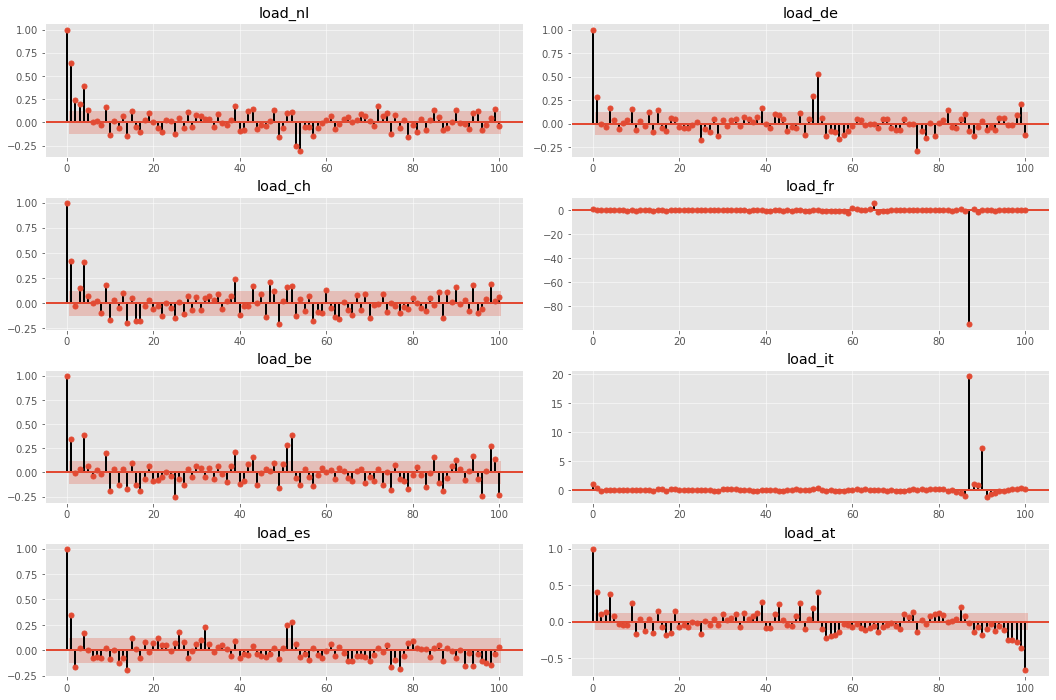

In [166]:
#
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in cols_plot:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(frame_week[x], lags=100, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

Data distribution analysis

Minor autocorrelation is observed at ACF (Auto-Correlation Function) and PACF (Partial Auto-Correlation Function) plots for all countries. None of countries exhibit annual seasonality.

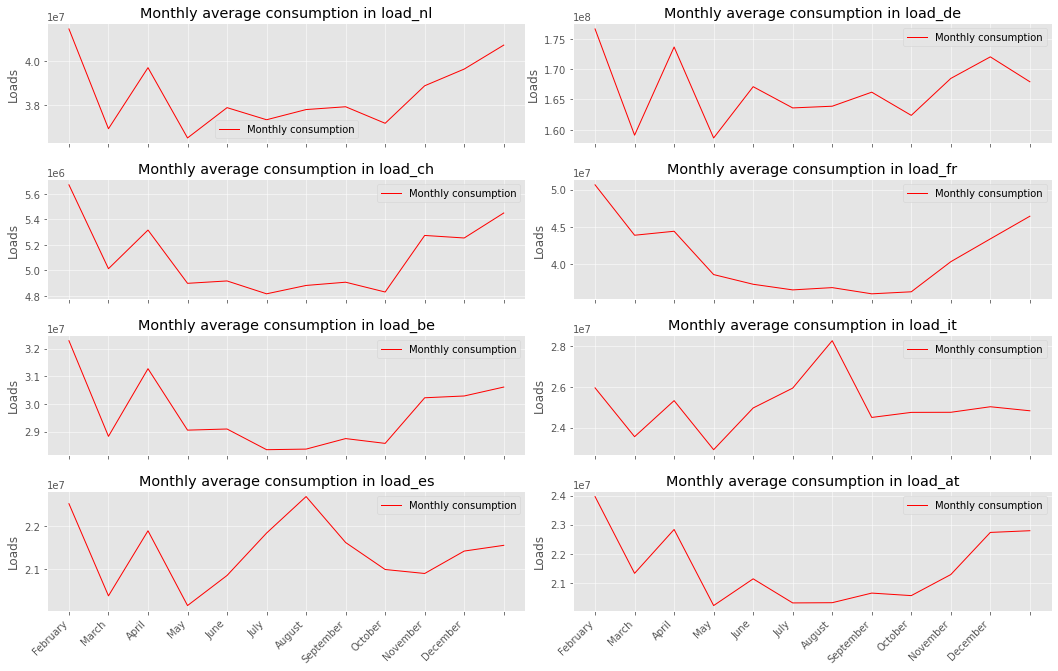

In [167]:
cols_plot = ['load_nl','load_de','load_ch','load_fr','load_be','load_it','load_es','load_at']
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.setp(ax,xticks=np.arange(13), xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
fig.autofmt_xdate(rotation=45)
for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(frame_month.groupby('month')[x].max(), linewidth=1, label='Monthly consumption',color='red')
    ax[rowindex,colindex].set_ylabel('Loads')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Monthly average consumption in'+' '+ x);  
    
    subplotindex=subplotindex+1

plt.show()
fig.savefig('Monthly_trend.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')
#https://www.delftstack.com/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

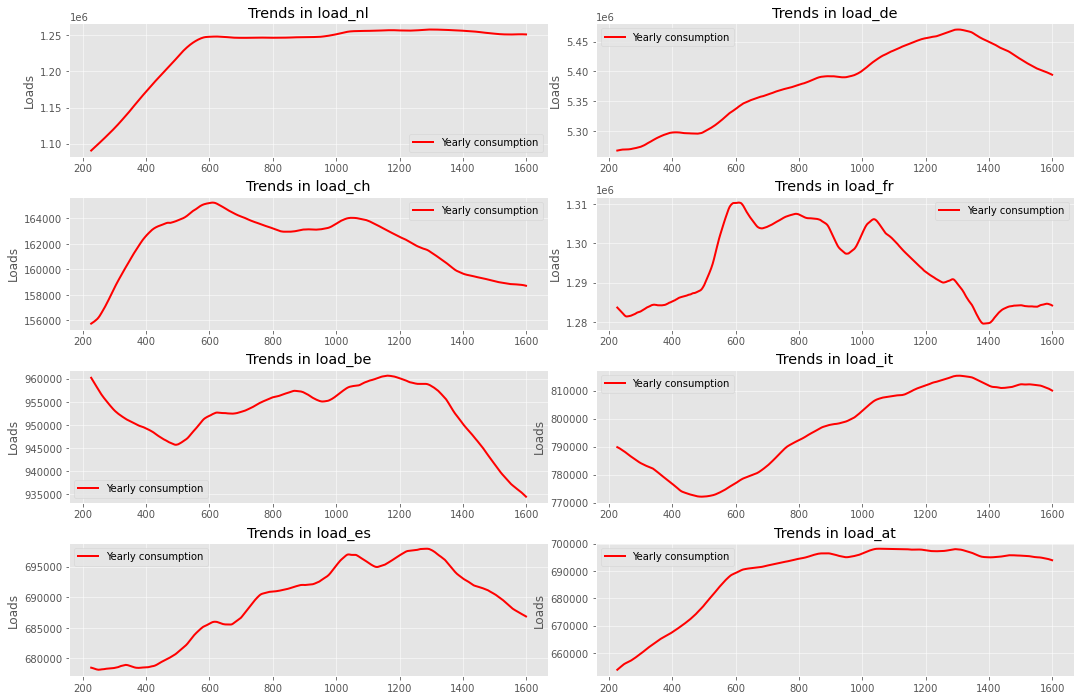

In [168]:
cols_plot = ['load_nl','load_de','load_ch','load_fr','load_be','load_it','load_es','load_at']
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    result = seasonal_decompose(frame_day[x].rolling(90, center=True).mean().dropna(), freq=365, filt=None)
    ax[rowindex,colindex].plot(result.trend,label='Yearly consumption',color='red')
    ax[rowindex,colindex].set_ylabel('Loads')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in '+x);  
    subplotindex=subplotindex+1

plt.show()
fig.savefig('trend.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')


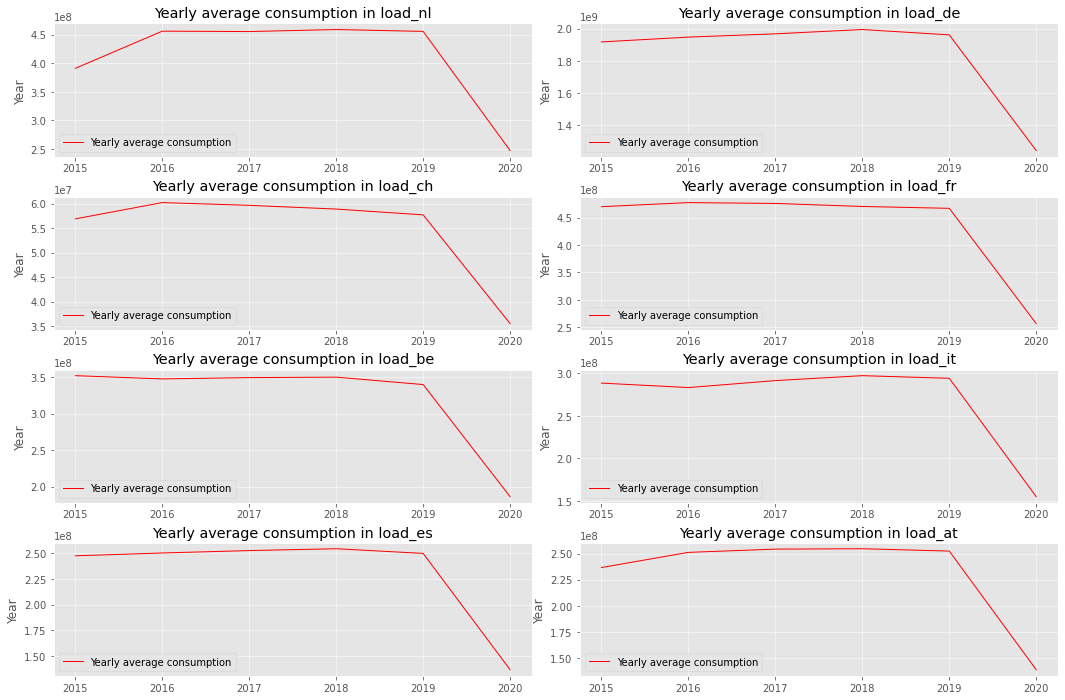

In [169]:
cols_plot = ['load_nl','load_de','load_ch','load_fr','load_be','load_it','load_es','load_at']
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(frame_month.groupby('year')[x].sum(), linewidth=1, label='Yearly average consumption',color='red')
    ax[rowindex,colindex].set_ylabel('Loads')
    ax[rowindex,colindex].set_ylabel('Year')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Yearly average consumption in'+' '+ x);  
    
    subplotindex=subplotindex+1

plt.show()
fig.savefig('yearly.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')

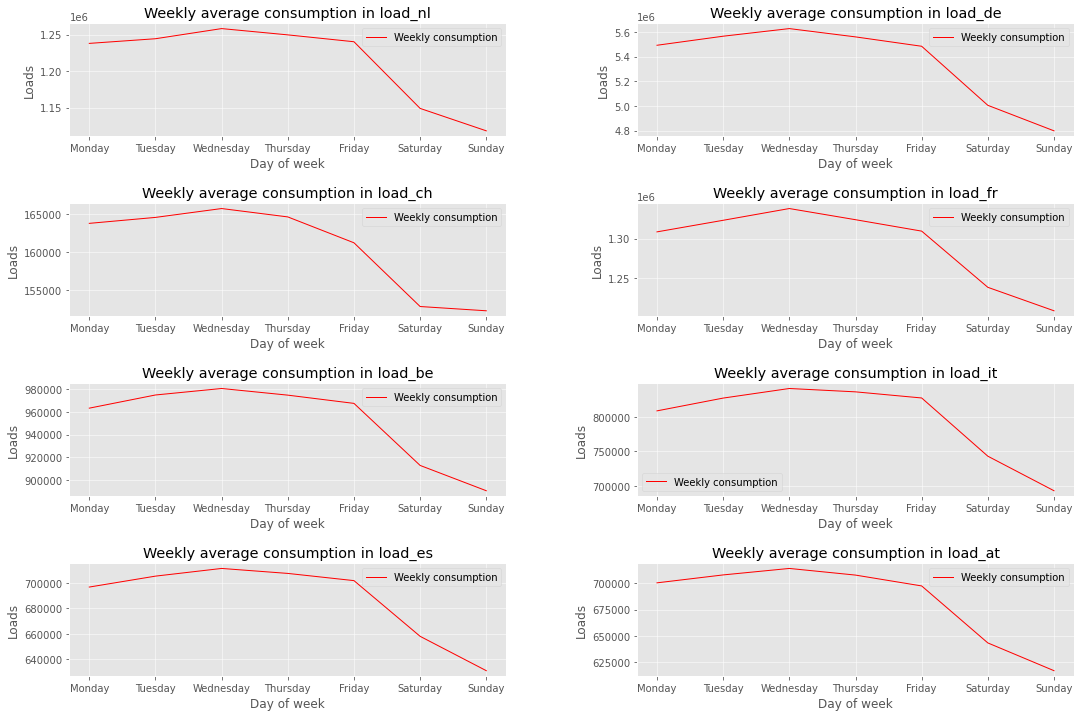

In [170]:
cols_plot = ['load_nl','load_de','load_ch','load_fr','load_be','load_it','load_es','load_at']
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.setp(ax, xticks=np.arange(7), xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(frame_day.groupby(frame_day.Date.dt.dayofweek)[x].mean(),linewidth=1,label='Weekly consumption',color='red')
    ax[rowindex,colindex].set_ylabel('Loads')
    ax[rowindex,colindex].set_xlabel('Day of week')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Weekly average consumption in'+' '+ x);   
    subplotindex=subplotindex+1
plt.show()
fig.savefig('weekly_trend.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')


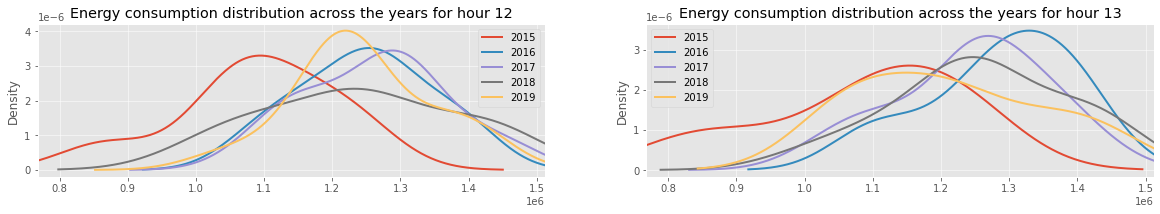

In [175]:
f = plt.figure(figsize = (20,40))
peak_hours = np.arange(12,14) 
for i, hour in enumerate(peak_hours):
    ax = f.add_subplot(12,2,i+1)
    for j, year in enumerate(frame_day['year'].unique()):
        frame_day[(frame_day['year'] == year) & (frame_day['hour'] == hour)]['load_nl'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)# ,\
                                #c = color_names[j])
    plt.title('Energy consumption distribution across the years for hour '+str(hour))
    plt.xlim(np.min(frame_day.load_nl.values), np.max(frame_day.load_nl.values))
#plt.tight_layout()
plt.show()
fig.savefig('elec_dist.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')

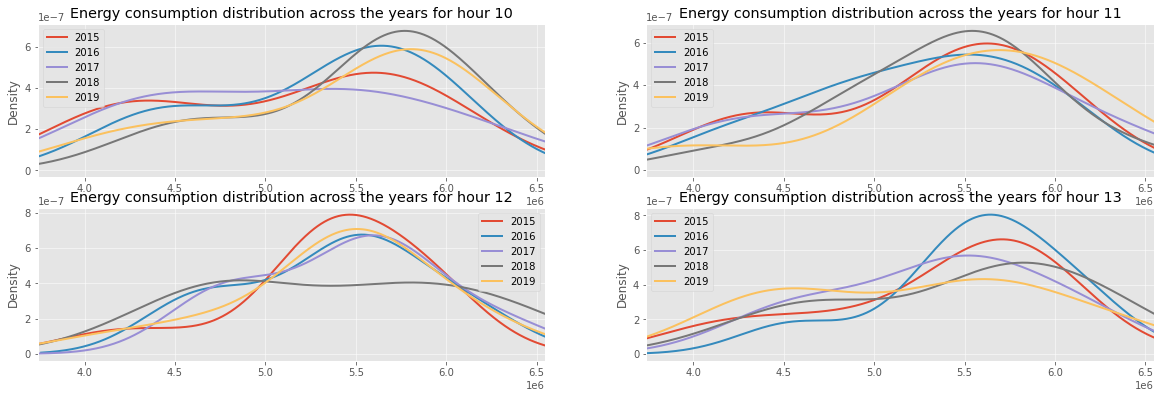

In [172]:
f = plt.figure(figsize = (20,40))
peak_hours = np.arange(10,14) 
for i, hour in enumerate(peak_hours):
    ax = f.add_subplot(12,2,i+1)
    for j, year in enumerate(frame_day['year'].unique()):
        frame_day[(frame_day['year'] == year) & (frame_day['hour'] == hour)]['load_de'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)# ,\
                                #c = color_names[j])
    plt.title('Energy consumption distribution across the years for hour '+str(hour))
    plt.xlim(np.min(frame_day.load_de.values), np.max(frame_day.load_de.values))
#plt.tight_layout()
plt.show()

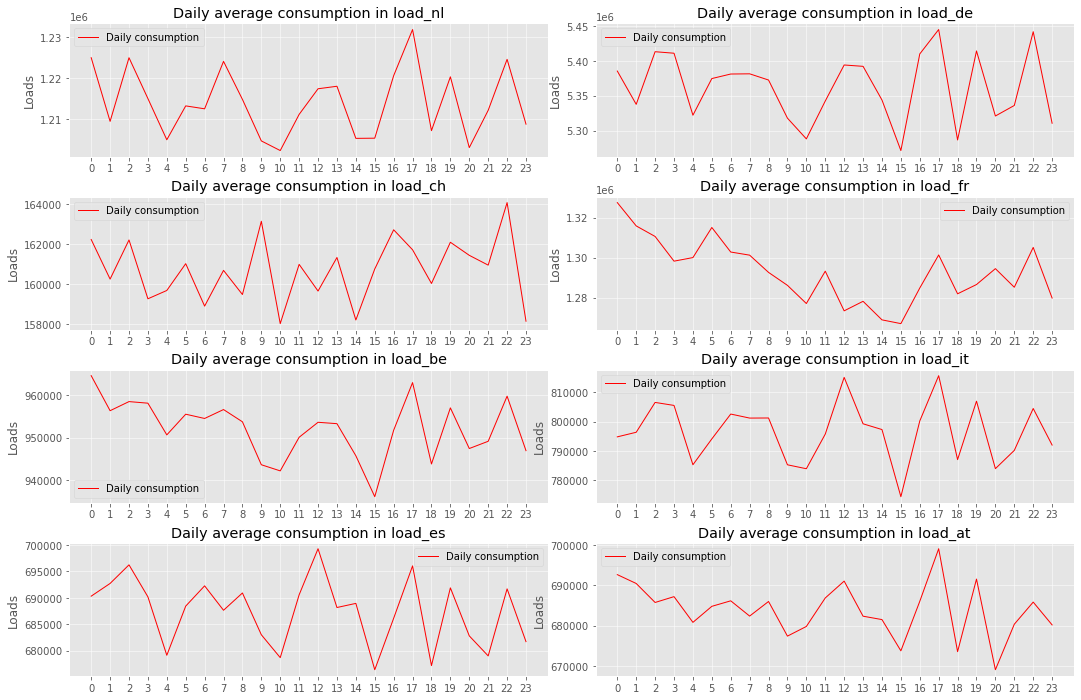

In [173]:
cols_plot = ['load_nl','load_de','load_ch','load_fr','load_be','load_it','load_es','load_at']
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(frame_day.groupby('hour')[x].mean(), linewidth=1, label='Daily consumption',color='red')
    ax[rowindex,colindex].set_ylabel('Loads')
    ax[rowindex,colindex].set_xticks(frame_day['hour'].unique())
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Daily average consumption in'+' '+ x);  
    
    subplotindex=subplotindex+1

plt.show()
fig.savefig('daily_trend.pdf',
            format='pdf',
            dpi=100,
            bbox_inches='tight')